# Introduction

I will use my own image to make this simple and clear tutorial. You can upload your own image to play around.

Let me discuss what technique i will be using and what is task?

Well, We have to find dominant color in a given image. I will be using an unsupervised learning algorithm (K-Means Clustering).

Steps ==>

1. Read Image and convert it in to a tidy format to work with.
2. Using Elbow method , i will find optimal number of clusters of given image.
3. I will recreate model with optimal number of Cluster.
4. I will use cluster center (RGB) value to show dominant color.

You can read about Kmeans Clustering [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

#### Note : There is always a chance of improvement, If you are reading my notebook and have suggestion to improve. You are always welcome, Please help me to grow together on Kaggle :) Happy Learning!!

# Preprocessing

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
image = img.imread("/kaggle/input/color-extraction-images/the-matrix-colors.jpg")
arrow = img.imread("/kaggle/input/color-extraction-images/20919.png")
print("Shape of Image and Arrow is ",image.shape,arrow.shape)

Shape of Image and Arrow is  (205, 384, 3) (630, 1200, 4)


Given Image is ===>


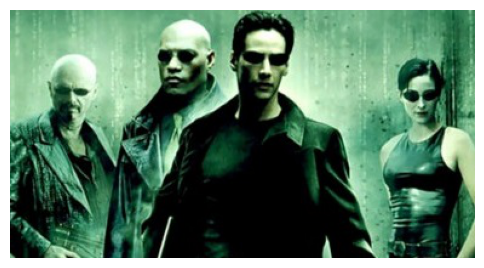

In [17]:
print("Given Image is ===>")
plt.figure(dpi=100)
plt.axis('off')
plt.imshow(image)
plt.show()

**Let us store RGB values of all pixels in lists r, g and b.**

In [18]:
r,g,b=[],[],[]
for row in image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

## Scaling

Let us scale the data using SciPY Library.
You can read more on SciPy Whiten [Here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.whiten.html)

In [19]:
from scipy.cluster.vq import whiten #Whiten is used to Scale the data

scaled_red = whiten(r)
scaled_blue = whiten(b)
scaled_green = whiten(g)

In [20]:
import pandas as pd
df = pd.DataFrame({'red':r,'blue':b,'green':g,'scaled_red':scaled_red,'scaled_blue':scaled_blue,
                   'scaled_green':scaled_green})
df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,74,101,145,1.058932,1.432450,1.687943
1,80,105,149,1.144791,1.489181,1.734507
2,81,105,150,1.159101,1.489181,1.746148
3,82,104,147,1.173411,1.474998,1.711225
4,94,116,159,1.345130,1.645190,1.850916


# Elbow Method

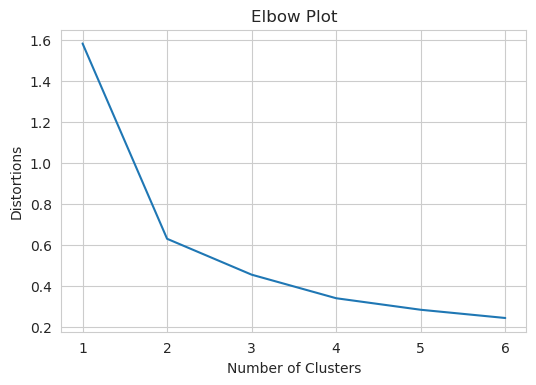

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import kmeans,vq

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
plt.figure(dpi=100)
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel("Distortions")
plt.show()

#### We can see from Elbow Plot, Optimal Number of Clusters is 3.

# K-Means Clustering

In [22]:
cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],3)
print(cluster_centers)

[[2.10664384 2.26065194 2.33187364]
 [0.05220858 0.12969697 0.17184108]
 [0.76698175 1.14097236 1.32548321]]


## Math

To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: 

**converted_pixel = standardized_pixel * pixel_std / 255**

In [23]:
# Get standard deviations of each color
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

Original Image is ===> 


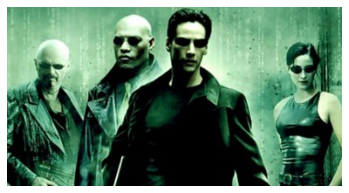

Extracting Colors from Image using KMeans Clustering ====>


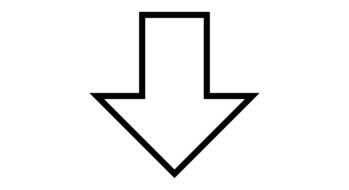

Dominant Colors of Image are===>


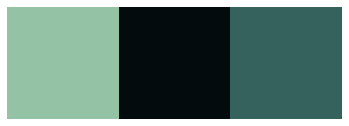

In [24]:
print("Original Image is ===> ")
plt.axis('off')
plt.imshow(image)
plt.show()

print("Extracting Colors from Image using KMeans Clustering ====>")
plt.axis('off')
plt.imshow(arrow)
plt.show();

print("Dominant Colors of Image are===>")
plt.axis('off')
plt.imshow([colors])
plt.show()

#### Thank you for reading this notebook, I hope this is useful for you. Please do upvote. :)